In [1]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import seaborn as sns 

In [2]:
from tailnflows.utils import load_raw_data

raw_data = load_raw_data('2024-05-de-sp500-new')
# raw_data_2 = load_raw_data('2024-05-de-sp500-b8')
# raw_data_3 = load_raw_data('2024-05-de-sp500-ttf-init')
# raw_data_4 = load_raw_data('2024-05-de-sp500-ttf-init-d2')


In [3]:
rows = [
    {
        'model': label.split(' ')[0],
        **data
    }
    for label, experiments in raw_data.items()
    for data in experiments
]
# rows += [
#     {
#         'model': label.split(' ')[0]+ '_b8',
#         **data
#     }
#     for label, experiments in raw_data_2.items()
#     for data in experiments
# ]
# rows += [
#     {
#         'model': label.split(' ')[0]+ '_sinit',
#         **data
#     }
#     for label, experiments in raw_data_3.items()
#     for data in experiments
# ]
# rows += [
#     {
#         'model': label.split(' ')[0]+ '_d2',
#         **data
#     }
#     for label, experiments in raw_data_4.items()
#     for data in experiments
# ]

df = pd.DataFrame(rows)
df['test_neg_ll_per_dim'] = df['tst_neg_ll'] / df['dim']
df.head()
name_map = {
    'ttf_aff_u': 'TTF',
    'ttf_fix_aff_u': 'TTF (fix)',
    'mtaf': 'mTAF',
    'gtaf': 'gTAF',
}
df['readable_name'] = df['model'].apply(lambda x: name_map.get(x, x))

In [4]:
df.groupby('readable_name').count()

,model,dim,seed,tst_neg_ll,test_neg_ll_per_dim
readable_name,,,,,
TTF,30,30,30,30,30
TTF (fix),30,30,30,30,30
gTAF,30,30,30,30,30
mTAF,30,30,30,30,30
ttf,10,10,10,10,10
ttf_aff,10,10,10,10,10
ttf_fix,10,10,10,10,10
ttf_fix_aff,10,10,10,10,10


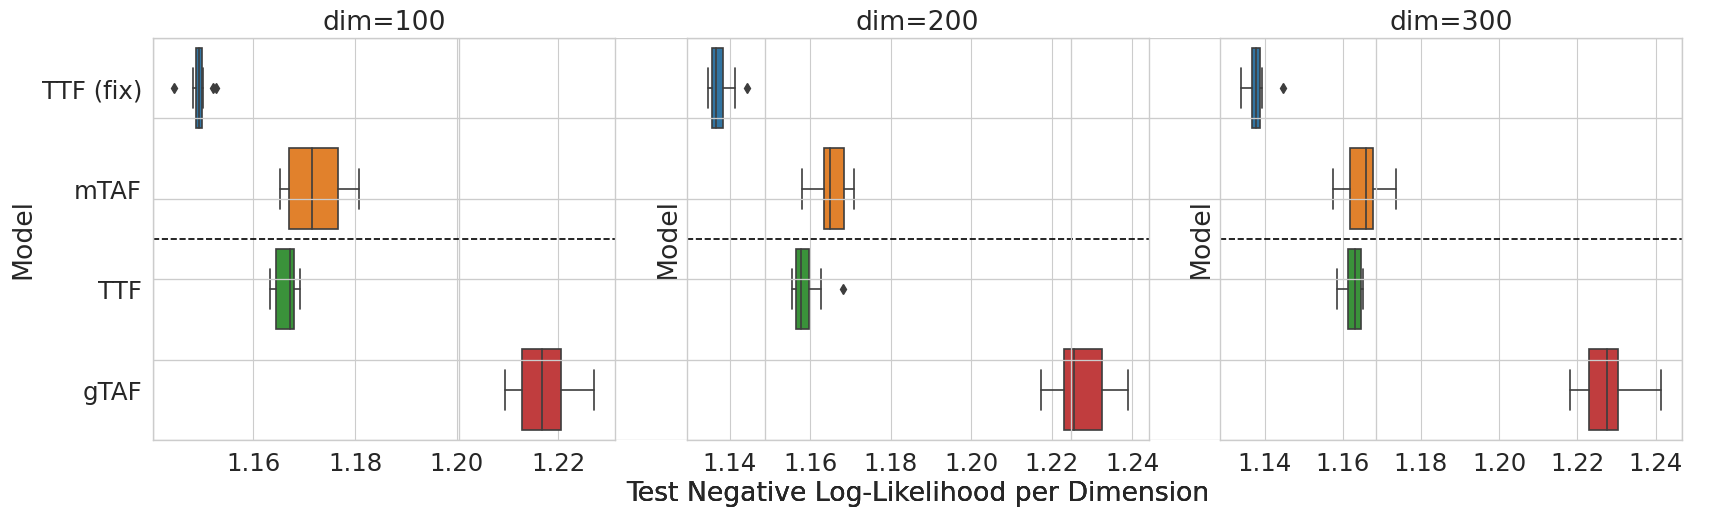

In [18]:
target_dims = [100, 200, 300]
fig, axarr = plt.subplots(1, len(target_dims), figsize=(18, 6), tight_layout=True, sharey=True)
if len(target_dims) == 1:
  axarr = [axarr]

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=2.)

for i, dim in enumerate(target_dims):
  j = 1

  wanted_data = df[df['dim'] == dim]

  sns.boxplot(
      data=wanted_data,
      x='test_neg_ll_per_dim',
      y='readable_name',
      order=['TTF (fix)', 'mTAF', 'TTF', 'gTAF'],
      orient='h',
      ax=axarr[i],
  )

  axarr[i].axhline(1.5, linestyle='--', c='black')
  axarr[i].set_title(f'dim={dim}')
  axarr[i].set_xlabel('')
  axarr[i].set_ylabel('Model')

  fig.add_subplot(111, frameon=False)
  plt.xlabel('Test Negative Log-Likelihood per Dimension')
  plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
  plt.tight_layout()
  plt.savefig(f"./real_sp500.png")

In [ ]:
proc_data = []
for label, fit_data in raw_data.items():
  for (test_ll, dim) in fit_data:
    if label in models:
      plot_label = models[label]
      proc_data.append({'model': plot_label, 'test_neg_ll': test_ll, 'dim': dim})

df = pd.DataFrame(proc_data)

In [4]:
rd_path =  f'../../experiment_output/returns_2024-01-31.p'
rd_path2 =  f'../../experiment_output/returns_2024-02-08.p'

raw_data = pickle.load( open(rd_path, "rb" ) )
raw_data2 = pickle.load( open(rd_path2, "rb" ) )

raw_data['TTF_m_fix_new'] = raw_data2['TTF_m_fix']
raw_data['TTF_m_stable'] = raw_data2['TTF_m_stable']
raw_data['TTF_m_affine_stable'] = raw_data2['TTF_m_affine_stable_longer+']
raw_data['TTF_m_affine_fix'] = raw_data2['TTF_m_affine_fixed_longer+']
raw_data['TTF_m_affine_stable_new'] = raw_data2['TTF_m_affine_stable__new']
raw_data['TTF_m_affine_fix_new'] = raw_data2['TTF_m_affine_fixed_new']

FileNotFoundError: [Errno 2] No such file or directory: '../../experiment_output/returns_2024-01-31.p'

In [ ]:
models = {
    # 'gTAF': 'gTAF',
    # 'TTF_m_init_-0,5->1,5': 'TTF',
    'mTAF': 'mTAF',
    # 'TTF_m_fix': 'TTF (fix)',
    # 'TTF_m_fix_new': 'TTF (fix)',
    'TTF_m_stable': 'TTF',
    # 'TTF_m_affine_stable': 'TTF aff',
    # 'TTF_m_affine_stable_new': 'TTF + affine',
    # 'TTF_m_affine_fix': 'TTF aff (fix)',
    # 'TTF_m_affine_fix_new': 'TTF + afffine (fix)',
}

In [5]:

df.test_neg_ll = df.test_neg_ll.astype('float')
target_dims = list(df.dim.unique())
target_dims = [100]
fig, axarr = plt.subplots(1, len(target_dims), figsize=(12, 6), tight_layout=True)
if len(target_dims) == 1:
  axarr = [axarr]

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=2.)

for i, dim in enumerate(target_dims):
  j = 1

  wanted_data = df[df['dim'] == dim]

  sns.boxplot(
      data=wanted_data,
      x='test_neg_ll',
      y='model',
      order=models.values(),
      orient='h',
      ax=axarr[i],
  )

  axarr[i].set_title(f'dim={dim}')
  plt.tight_layout()
  plt.savefig(f"../../../ftfnf_writeup/graphics/real_sp500_dim_100_new.png")

NameError: name 'raw_data' is not defined